# Detail Supervised Learning workflow on a simple example

In this workflow we will have a look at the full workflow for supervised learning on a simple exemplary use case, the Loan Prediction (cf. [Link](https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan)).

The business problem is how to predict which customers will receive a loan.

## Prepare workflow

We are loading the relevant libraries.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns

## Step 1: Get the data

In [114]:
df_loan = pd.read_csv("https://raw.githubusercontent.com/JensKohl/Lecture-Technical_Applications_Data_Management-Slides_and_Notebooks/main/Datasets/Loan_Data.csv", sep=",")
df_loan.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Step 2: Data preparation and cleaning

In this step we prepare the data for Machine learning. Therefore, we have to do several things, for instance:
- remove missing data (data imputation).
- convert data types: some ML algorithms can only work with numbers.
- generate new features, if we think they'll help us in Machine Learning

This step is the most labour-intensive and very often, exploratory data analyses techniques (which we know from previous lectures) are used.

In [31]:
# first we check some basic stuff about the dataset
df_loan.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


We see we only have a small dataset, but this fits perfectly for describing the whole workflow.

In [32]:
# first we check for missing data
df_loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For some samples, data is missing. For the sake of this exemplary use case, we remove all samples having missing values. Normally, we should thoroughly analyse how to deal best with such data.

In [33]:
df_loan = df_loan.dropna(axis=0) # drop lines having a NaN value and store it in the same dataset (thus overwriting)
df_loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we begin with preparing the data for machine learning. 
First we have a look at the data types

In [34]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have to convert the types of all features with an object type. We can use categorical types if we have several values for a feature or boolean if there are only 2 values (e.g. Loan_Status).

I often use another dataset for these operations, so in case something doesn't work during data engineering, I can easily step back without repeating all steps.

We will show the type cast for 2 features in detail.

Let's start with the label, Loan_status

In [64]:
df_loan_ML = df_loan.copy(deep=True) # first make a copy of the original data set

In [56]:
df_loan_ML["Loan_Status"].unique() # show the different, unique values

array(['N', 'Y'], dtype=object)

Since we only have 2, let's cast this to an integer variable (we could do this normally to Boolean variable, but ML algorithm will cast it again to integer...)

In [65]:
df_loan_ML["Loan_Status"] = df_loan_ML["Loan_Status"].map({"Y": 1, "N": 0})
df_loan_ML["Loan_Status"] = df_loan_ML["Loan_Status"].astype('int')

In [66]:
df_loan_ML.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

We drop the Loan_ID because we don't really need it: each line/ sample already provides an ID.....

In [67]:
df_loan_ML = df_loan_ML.drop(columns="Loan_ID", axis=1)

We will leave out creating new features, because we are rather more interested in the whole workflow. But these steps are really important in a real world use case to massively increase the accuracy!!

For our use case we are using a so called Label Encoder for all columns with object data type. What this does, is give each unique value of a specific feature a unique number.

In [71]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

text_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] # here we enter all the different text columns we have

for text_column in text_columns:
    df_loan_ML[text_column] = label_encoder.fit_transform(df_loan_ML[text_column])

Now we start with setting up the data sets for machine learning.

In [72]:
df_loan_ML.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

We see that we only have numbers as data types...good!

Now we prepare the needed matrix X with all the features and the vector y for the label for machine learning, and we are done with processing.

In [73]:
y = df_loan_ML["Loan_Status"] # store the label in y
X = df_loan_ML.drop(columns="Loan_Status", axis=1)

## Step 3: Prepare Machine Learning: split data, select model and initialise parameters.

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336, 11), (144, 11), (336,), (144,))

After we split the data, we can now select the Machine Learning model.

For our use case, we will only focus on a Decision Tree and only focus on one hyperparameter, maxDepth.

But this is (after having a lot of clean data) the phase where one can gain a lot of accuracy for the model.

If you want to experiment, you try out the different hyperparameters! 
The full documentation for this TreeClassifier and its tuning parameters can be found here: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).


In [106]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(max_depth=5) 

## Step 4: Training

Now we start the training.

In [107]:
tree_classifier = decisionTree.fit(X_train, y_train)

We visualise how the tree makes its decision:

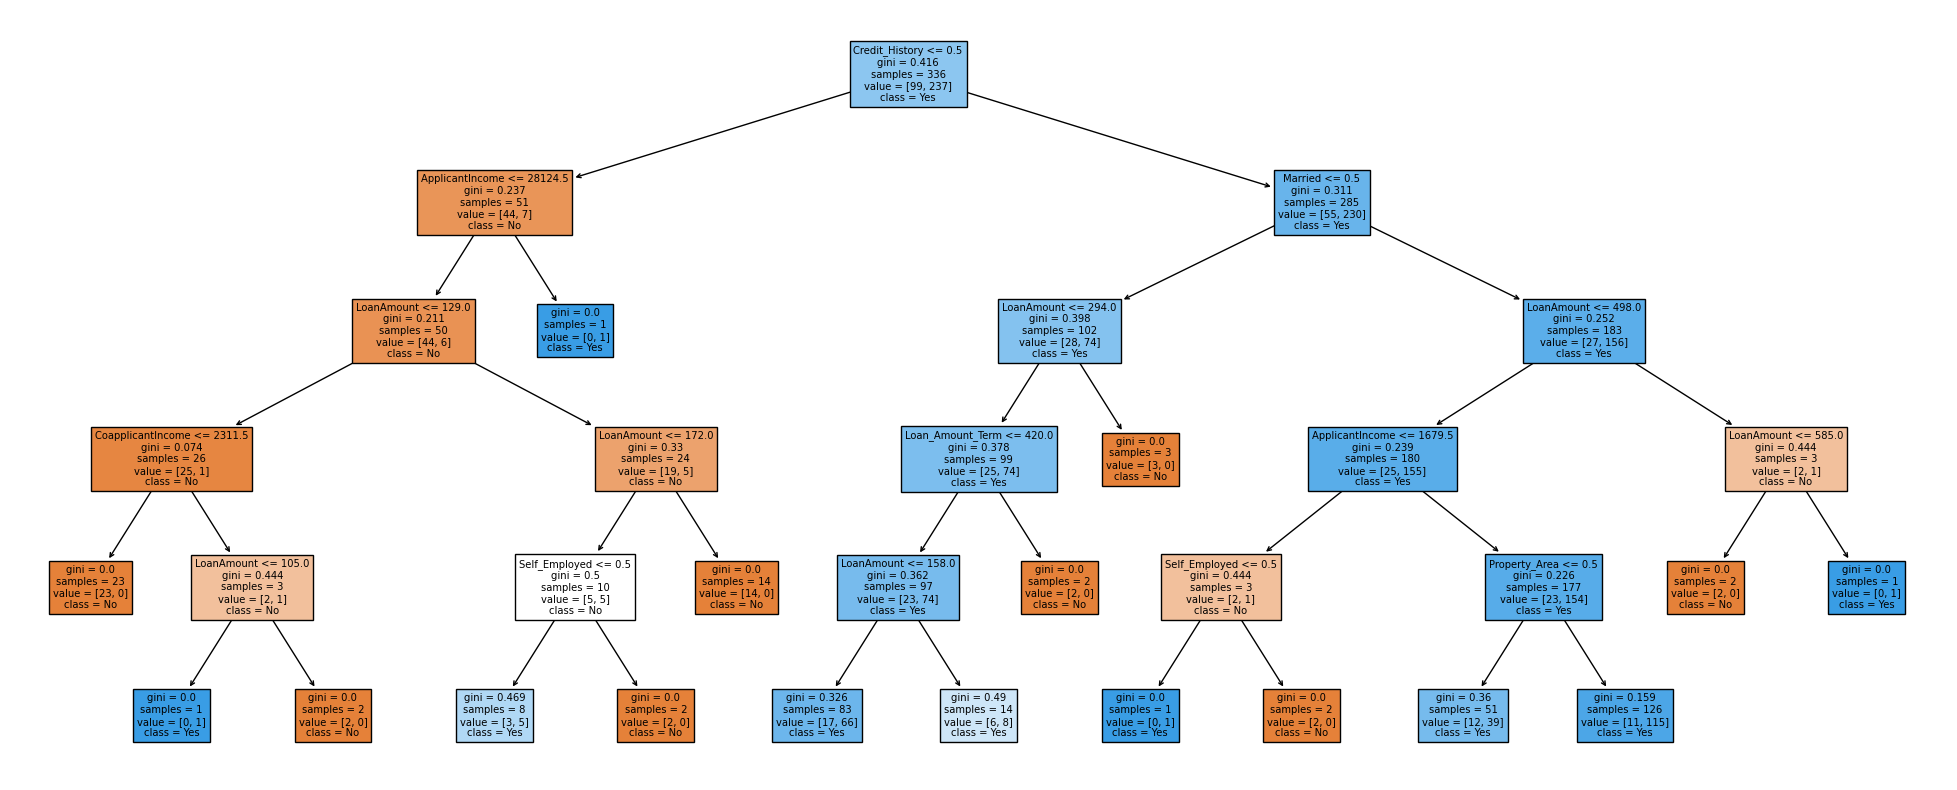

In [108]:
from sklearn import tree

fig = plt.figure(figsize=(25,10))
# der Aufruf eine Zeile drunter ist ein Fix, damit die Darstellung schöner ist.
_ = tree.plot_tree(tree_classifier, 
                   feature_names= ["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"],  
                   class_names=["No", "Yes"], #loan yes = 1
                   filled=True)

## Step 5: Validate Model

In [109]:
y_pred_DecTree = tree_classifier.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score

print('accuracy is ', accuracy_score(y_pred_DecTree, y_test)) # Print accuracy score 

accuracy is  0.7569444444444444


Confusion Matrix
[[16 33]
 [ 2 93]]


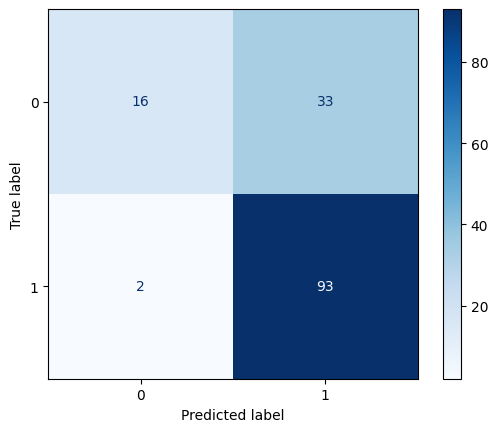

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(tree_classifier, X_test, y_test, display_labels=tree_classifier.classes_, cmap=plt.cm.Blues);

print("Confusion Matrix")
print(disp.confusion_matrix)